In [1]:
from DataPreparation import prepare_data
from GradientDescent import GM_algorithm
from RandomBCGD import rand_BCGD
from CyclicBCGD import cycl_BCGD
from common import calc_Lipshitz
from common import plot_data,graph1,graph2,graph3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y,X_l,X_u,y_l,y_u,W_l,W_u,lr,max_iter,eps,random_seed = prepare_data("config.yml")

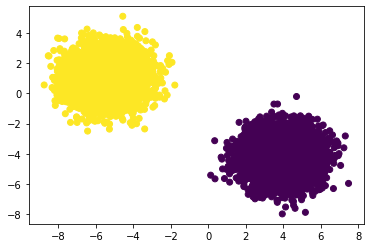

In [3]:
# all data points
plot_data(X,y)

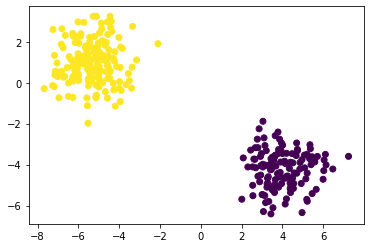

In [4]:
# labelled data points
plot_data(X_l,y_l)

In [5]:
L = calc_Lipshitz(W_l, W_u)
stepsize = 1/L

In [6]:
y_pred_GM, loss_stat_GM, time_stat_GM = GM_algorithm(y_l, W_l, W_u, stepsize, max_iter, eps)

Initial loss: 488748.93362724374
Iteration 1: loss 446520.8217779748, gradient norm 4.252056936520551
Iteration 2: loss 410141.0622234177, gradient norm 3.8788422266722344
Iteration 3: loss 377221.0283336589, gradient norm 3.6796211122143254
Iteration 4: loss 347156.81639122014, gradient norm 3.5130454201139
Iteration 5: loss 319606.63654354675, gradient norm 3.361463642297864
Iteration 6: loss 294318.40299178415, gradient norm 3.219728233153749
Iteration 7: loss 271084.58032650925, gradient norm 3.085706925509668
Iteration 8: loss 249725.52801802036, gradient norm 2.958293643136228
Iteration 9: loss 230081.8459035701, gradient norm 2.836809903066184
Iteration 10: loss 212010.2113224162, gradient norm 2.72078241919266
Iteration 11: loss 195380.78436114098, gradient norm 2.6098478616749103
Iteration 12: loss 180075.4049223889, gradient norm 2.503707580220885
Iteration 13: loss 165986.232336661, gradient norm 2.402104242772823
Iteration 14: loss 153014.65594447908, gradient norm 2.304808

In [7]:
y_pred_RB, loss_stat_RB, time_stat_RB = rand_BCGD(y_l, W_l, W_u, lr, len(W_u), max_iter, eps, random_seed)

Initial loss: 488748.93362724374
Interation 0, loss:  2225404.8447644864, norm: 50.989061493176706
Interation 1, loss:  1683647.8486753623, norm: 33.9074624892438
Interation 2, loss:  1010761.1488897089, norm: 23.45538549788049
Interation 3, loss:  588467.1934220599, norm: 15.8720864849828
Interation 4, loss:  339315.5265855537, norm: 11.1491764306034
Interation 5, loss:  189766.67743573166, norm: 8.0144574877427
Interation 6, loss:  122242.89103817078, norm: 5.276635341633938
Interation 7, loss:  79092.26494439306, norm: 4.1529580304807405
Interation 8, loss:  55209.03116329543, norm: 2.9742406079050885
Interation 9, loss:  40027.499806426815, norm: 2.3810314748221293
Interation 10, loss:  28854.525607967407, norm: 1.9619906924071908
Interation 11, loss:  22316.369861185336, norm: 1.5638210553964034
Interation 12, loss:  17332.973571997456, norm: 1.2975176501270214
Interation 13, loss:  13893.936729027873, norm: 1.0852089023086262
Interation 14, loss:  11530.445589382627, norm: 0.8850

In [8]:
y_pred_CB, loss_stat_CB, time_stat_CB = cycl_BCGD(y_l, W_l, W_u, lr, len(W_u), max_iter, eps)

Initial loss: 488748.93362724374
Interation 0, loss:  369870.2882389134, norm: 53.00870250591813
Interation 1, loss:  292112.26743081503, norm: 21.49550795176441
Interation 2, loss:  197001.8036097347, norm: 10.900624942252735
Interation 3, loss:  130564.82312509924, norm: 6.4318895527507705
Interation 4, loss:  88528.5518436467, norm: 4.214259519688354
Interation 5, loss:  62021.72724352139, norm: 2.9710576029088736
Interation 6, loss:  44896.10240236576, norm: 2.207283559956935
Interation 7, loss:  33474.11121153736, norm: 1.7048954104714689
Interation 8, loss:  25608.278787487183, norm: 1.3569237459103707
Interation 9, loss:  20028.461596840654, norm: 1.1060202397303336
Interation 10, loss:  15964.028403913448, norm: 0.919177599900539
Interation 11, loss:  12933.567058282842, norm: 0.7762948291213035
Interation 12, loss:  10627.43173512624, norm: 0.6645617832990268
Interation 13, loss:  8840.868517145576, norm: 0.5755049505877352
Interation 14, loss:  7434.972761157984, norm: 0.5033

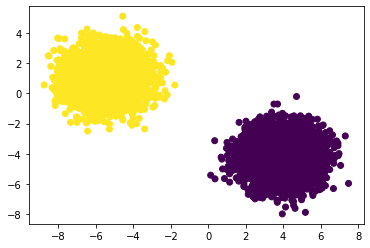

In [9]:
# plotting the points and coloring them with the predicted values of GM, Rand_BCGD and cycl_BCGD
plot_data(X_u, y_pred_GM)

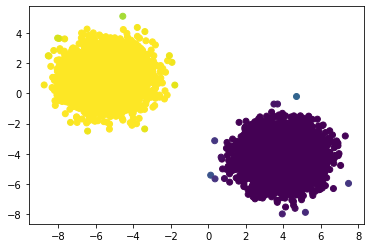

In [10]:
plot_data(X_u, y_pred_RB)

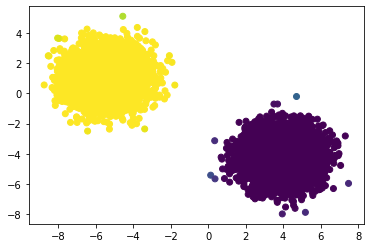

In [11]:
plot_data(X_u, y_pred_CB)

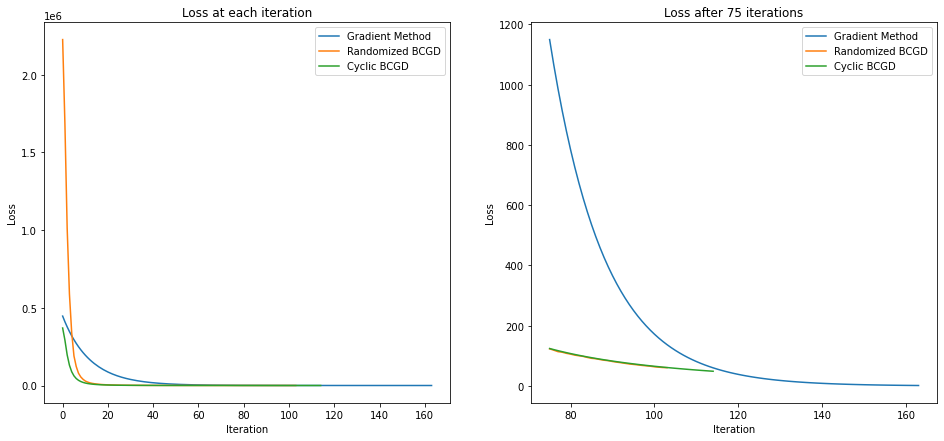

In [12]:
graph1(loss_stat_GM, loss_stat_RB,loss_stat_CB)

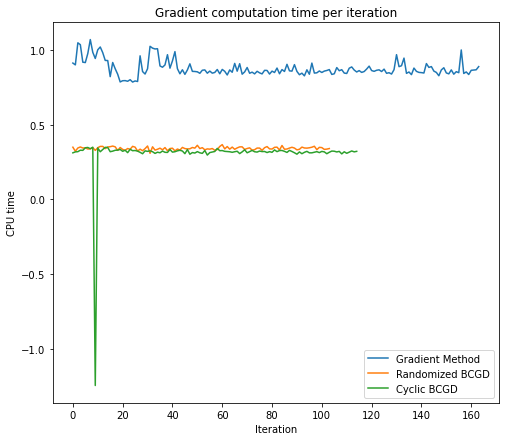

In [13]:
graph2(time_stat_GM, time_stat_RB, time_stat_CB)

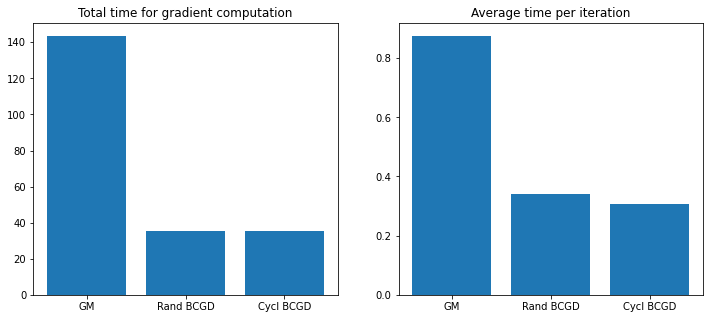

In [14]:
graph3(time_stat_GM, time_stat_RB, time_stat_CB)

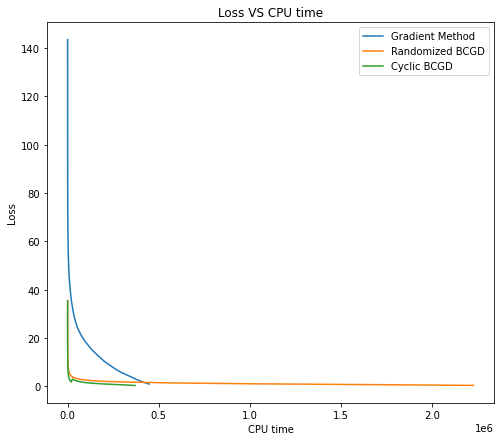

In [15]:
cpu_stat_GM = np.cumsum(time_stat_GM)
cpu_stat_RB = np.cumsum(time_stat_RB)
cpu_stat_CB = np.cumsum(time_stat_CB)

plt.figure(figsize=(8,7))
plt.plot(loss_stat_GM, cpu_stat_GM, label = "Gradient Method")
plt.plot(loss_stat_RB, cpu_stat_RB, label = "Randomized BCGD")
plt.plot(loss_stat_CB, cpu_stat_CB, label = "Cyclic BCGD")
plt.title("Loss VS CPU time")
plt.xlabel("CPU time")
plt.ylabel("Loss")
plt.legend()

In [16]:
from DataPreparation import prepare_dataset

df,W_l2, W_u2, X_l2, X_u2, y_l2, y_u2,max_iter2,eps2,randomseed2 = prepare_dataset("config.yml")

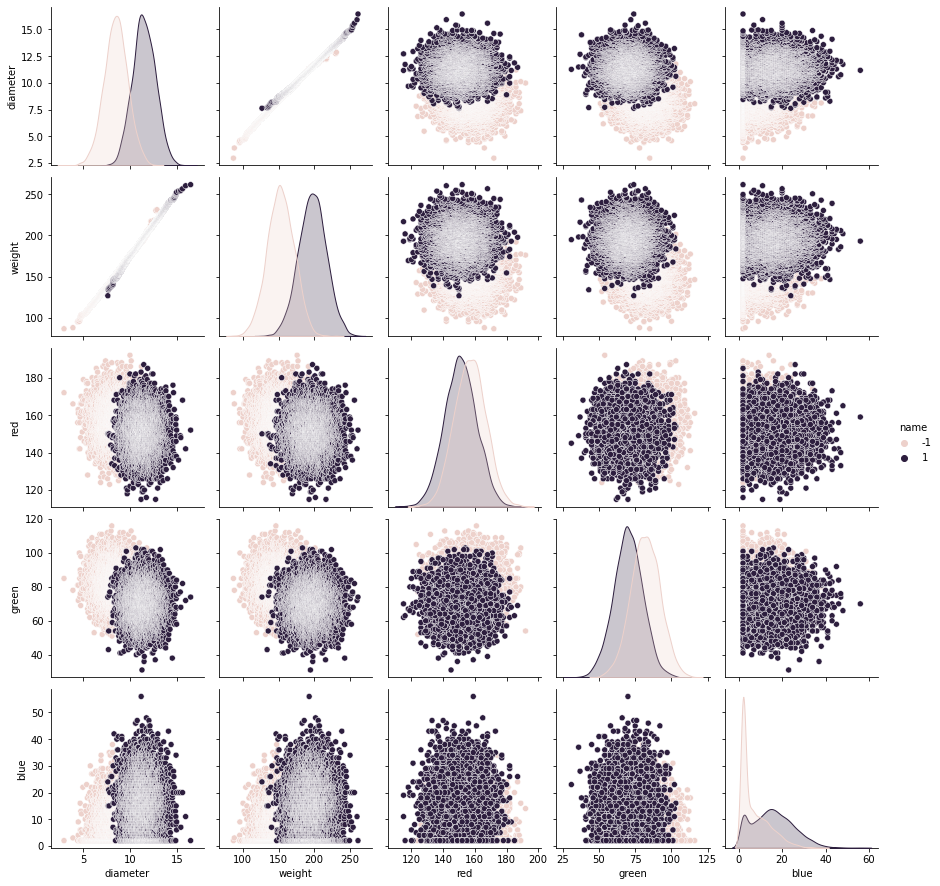

In [17]:
_ = sns.pairplot(df,hue="name")

In [18]:
L2 = calc_Lipshitz(W_l2, W_u2)
stepsize2 = 1/L2

In [19]:
y_pred_GM2, loss_stat_GM2, time_stat_GM2 = GM_algorithm(y_l2, W_l2, W_u2, stepsize2, max_iter2, eps2)

Initial loss: 2801.667592775107
Iteration 1: loss 2644.0029010229764, gradient norm 1.8413280293852667
Iteration 2: loss 2529.4786211250375, gradient norm 1.5224198969101392
Iteration 3: loss 2434.6171843028824, gradient norm 1.3747745952953367
Iteration 4: loss 2352.4653899731966, gradient norm 1.2745555902494565
Iteration 5: loss 2279.6013019508387, gradient norm 1.1976424230222678
Iteration 6: loss 2213.988577997352, gradient norm 1.1347613294268486
Iteration 7: loss 2154.2774786357436, gradient norm 1.0813328250306165
Iteration 8: loss 2099.5083941481203, gradient norm 1.0347471572633746
Iteration 9: loss 2048.964591334366, gradient norm 0.9933697941107246
Iteration 10: loss 2002.0907786700348, gradient norm 0.9561059946736385
Iteration 11: loss 1958.4444097372889, gradient norm 0.9221848480088501
Iteration 12: loss 1917.6647788789082, gradient norm 0.8910418962069782
Iteration 13: loss 1879.4524672880873, gradient norm 0.8622507120328107
Iteration 14: loss 1843.5551441613516, grad

In [20]:
y_pred_RB2, loss_stat_RB2, time_stat_RB2 = rand_BCGD(y_l2, W_l2, W_u2, stepsize2, len(W_u2), max_iter2, eps2, randomseed2)

Initial loss: 2801.667592775107
Interation 0, loss:  2727.1963159644506, norm: 2.5389836059910746
Interation 1, loss:  2675.1884440788644, norm: 2.3306583508365906
Interation 2, loss:  2623.4373248554652, norm: 2.268837363222813
Interation 3, loss:  2599.524733815063, norm: 2.1434121744919974
Interation 4, loss:  2586.4716775429665, norm: 2.0344815980436373
Interation 5, loss:  2592.148106345524, norm: 1.9954418620400969
Interation 6, loss:  2586.1875608419505, norm: 1.8782010985962467
Interation 7, loss:  2597.5515379994213, norm: 1.818286506289284
Interation 8, loss:  2621.0721776371047, norm: 1.774625827462668
Interation 9, loss:  2634.2470115453334, norm: 1.651443123773404
Interation 10, loss:  2655.8910613531616, norm: 1.556424086206572
Interation 11, loss:  2680.314515193504, norm: 1.4966072412983986
Interation 12, loss:  2706.420998586924, norm: 1.4379765244828409
Interation 13, loss:  2736.3116359887135, norm: 1.459718946452952
Interation 14, loss:  2762.839659666368, norm: 1.3

In [21]:
y_pred_CB2, loss_stat_CB2, time_stat_CB2 = cycl_BCGD(y_l2, W_l2, W_u2, stepsize2, len(W_u2), max_iter2, eps2)

Initial loss: 2801.667592775107
Interation 0, loss:  2644.0029010229764, norm: 1.8413280293852667
Interation 1, loss:  2528.7025944338584, norm: 1.7384226084923589
Interation 2, loss:  2447.0515209309247, norm: 1.6445307819917674
Interation 3, loss:  2392.101035119075, norm: 1.5586956800822034
Interation 4, loss:  2358.3067656592007, norm: 1.4800690668355694
Interation 5, loss:  2341.2416128227123, norm: 1.4078990899913015
Interation 6, loss:  2337.368182693277, norm: 1.341519341261027
Interation 7, loss:  2343.858210218884, norm: 1.2803390934440368
Interation 8, loss:  2358.449154730223, norm: 1.2238345960794907
Interation 9, loss:  2379.3302222030447, norm: 1.1715413241110455
Interation 10, loss:  2405.0516987997994, norm: 1.1230470846726788
Interation 11, loss:  2434.4527644320906, norm: 1.0779858961066255
Interation 12, loss:  2466.6039672448674, norm: 1.0360325610966836
Interation 13, loss:  2500.76133810901, norm: 0.9968978626573296
Interation 14, loss:  2536.3297540106228, norm:

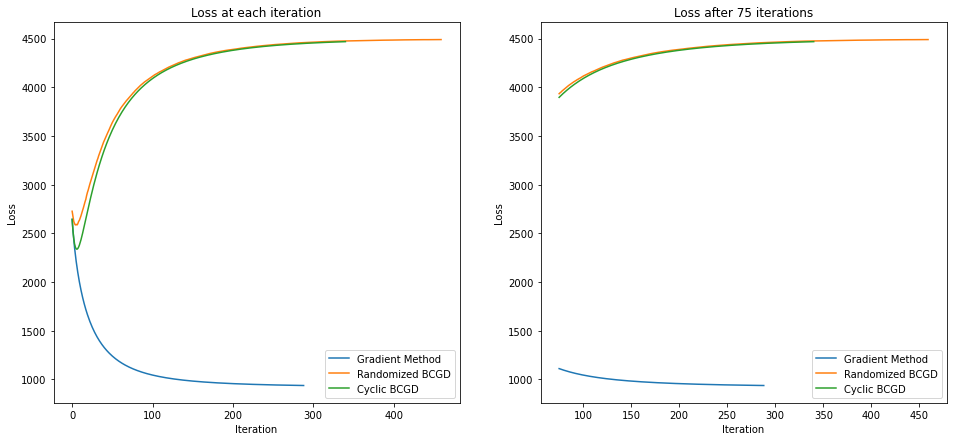

In [22]:
graph1(loss_stat_GM2, loss_stat_RB2,loss_stat_CB2)

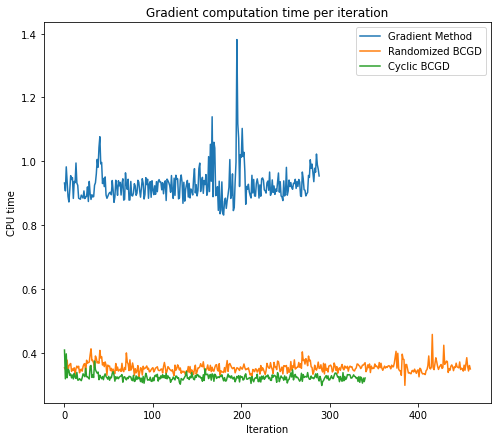

In [23]:
graph2(time_stat_GM2, time_stat_RB2, time_stat_CB2)

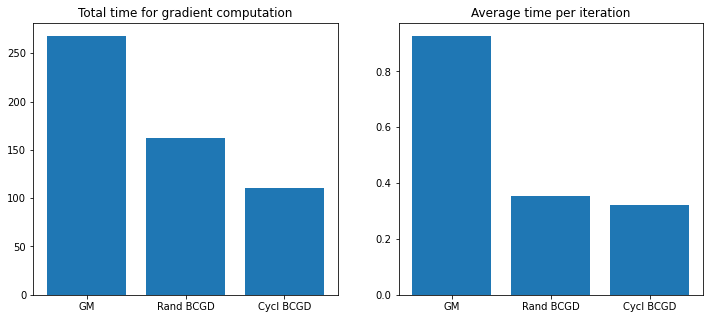

In [24]:
graph3(time_stat_GM2, time_stat_RB2, time_stat_CB2)

In [25]:
import numpy as np
# no of correct prediction by gradient method
y_norm = [1 if i > 0 else -1 for i in y_pred_GM2]
y_norm = np.array(y_norm)
np.sum(y_norm == y_u2)

8936

In [26]:
# no of correct prediction by random BCG
y_norm = [1 if i > 0 else -1 for i in y_pred_RB2]
y_norm = np.array(y_norm)
np.sum(y_norm == y_u2)

8716

In [27]:
# no of correct prediction by Cyclic BCG
y_norm = [1 if i > 0 else -1 for i in y_pred_CB2]
y_norm = np.array(y_norm)
np.sum(y_norm == y_u2)

8716

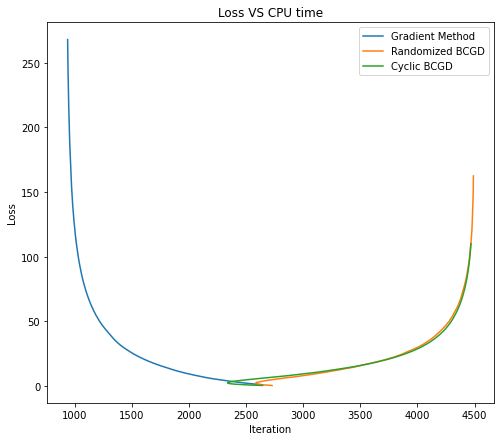

In [28]:

cpu_stat_GM2 = np.cumsum(time_stat_GM2)
cpu_stat_RB2 = np.cumsum(time_stat_RB2)
cpu_stat_CB2 = np.cumsum(time_stat_CB2)

plt.figure(figsize=(8,7))
plt.plot(loss_stat_GM2, cpu_stat_GM2, label = "Gradient Method")
plt.plot(loss_stat_RB2, cpu_stat_RB2, label = "Randomized BCGD")
plt.plot(loss_stat_CB2, cpu_stat_CB2, label = "Cyclic BCGD")
plt.title("Loss VS CPU time")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()